In [1]:
import matplotlib.pyplot as plt
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:96% !important; }</style>"))


from tensorflow.keras.models import load_model
from keras_radam import RAdam
import joblib

from CRISMrelatedMethods.mineralDetection import *
from CRISMrelatedMethods.dataRead import *

In [2]:
imageFile="../../rawData/data_5/MROCR_4001/mrocr_4001/mtrdr/2008/2008_006/frt000093be/frt000093be_07_if166j_mtr3.img"
hdrFile="../../rawData/data_5/MROCR_4001/mrocr_4001/mtrdr/2008/2008_006/frt000093be/frt000093be_07_if166j_mtr3.HDR"

wavelengths,image,LINES,LINE_SAMPLES,BANDS,imageFrame=readImage(hdrFile,imageFile)

imgdata=np.swapaxes(np.swapaxes(image,0,2),0,1).reshape(-1,BANDS)
framedata=imageFrame.reshape(LINES*LINE_SAMPLES)

804 832 489
bsq Nanometers
(489, 804, 832)
image read as bsq


In [3]:
imgdata_crsmCRSS,BandCroppedImage=getPreprocessedData(wavelengths,imgdata,framedata,pipeline='cr_sm_CR_SS',returnBandCroppedImage=True,LINES=LINES,LINE_SAMPLES=LINE_SAMPLES)

In [5]:
ann=load_model('models/crsmCRSSFE_ANN.h5', custom_objects={'RAdam': RAdam})
PredProb_ann=ann.predict(imgdata_crsmCRSSFE)

rfc=joblib.load('models/crsmCRSSFE_RFC.z')
PredProb_rfc=rfc.predict_proba(imgdata_crsmCRSSFE)

svc=joblib.load('models/crsmCRSSFE_SVC.z')
pca=joblib.load('models/crsmCRSSFE_PCA.z')
PredProb_svc=svc.predict(pca.transform(imgdata_crsmCRSSFE))

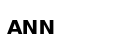

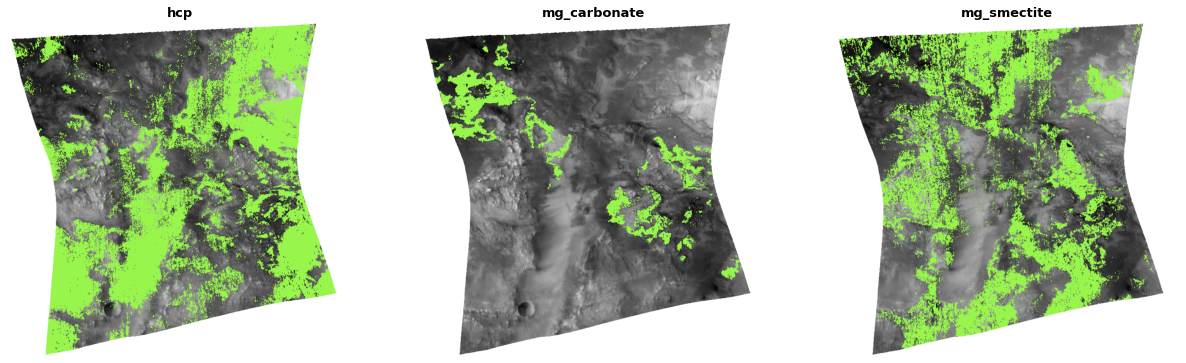

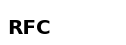

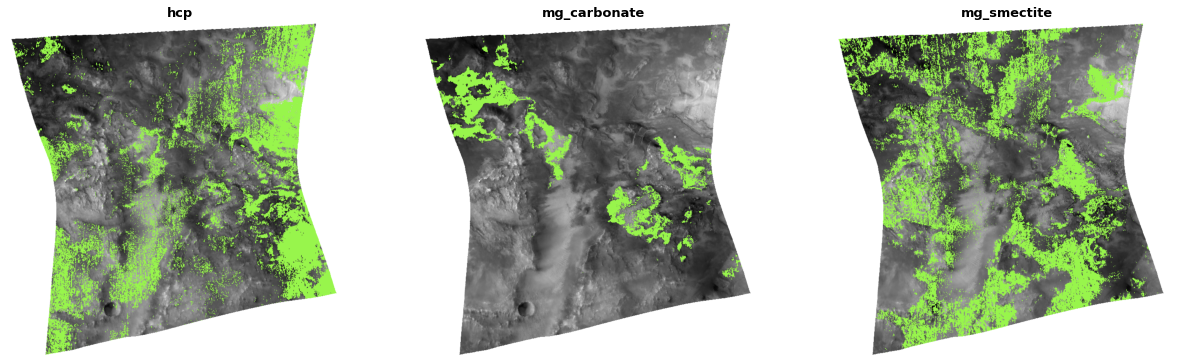

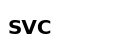

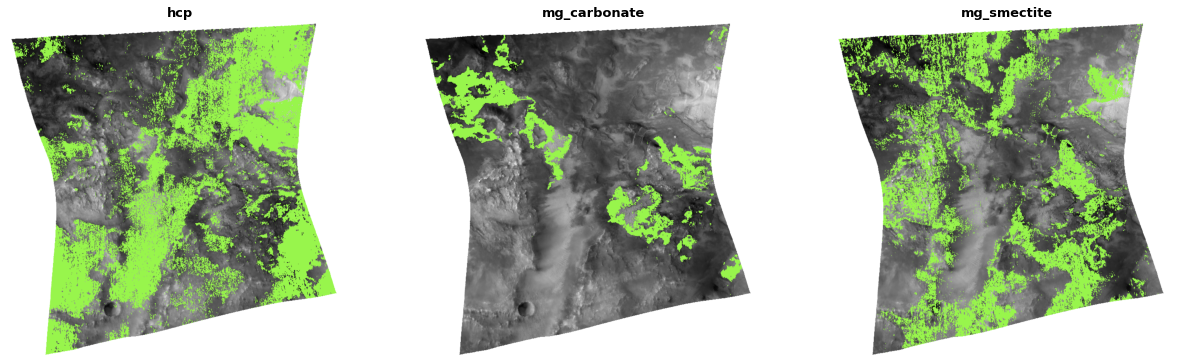

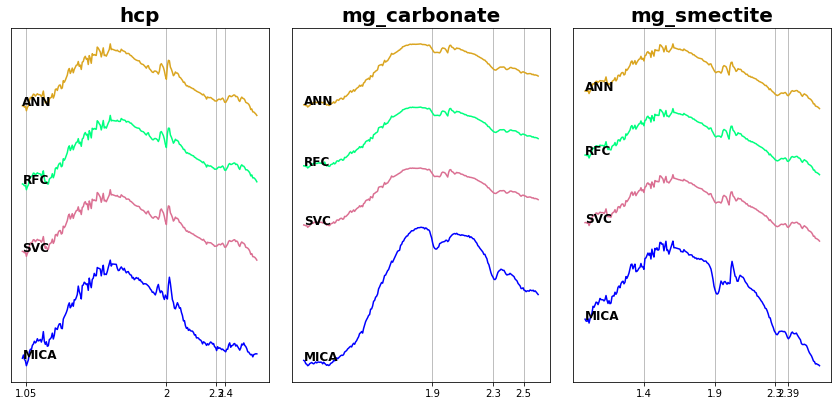

In [61]:
generateDominatingMineralPlots({'ANN':PredProb_ann,'RFC':PredProb_rfc,'SVC':PredProb_svc},BandCroppedImage)